In [34]:
import pandas as pd
import numpy as np
import tqdm
import tpot
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import dask_ml.model_selection

### Pembagian data train dan data test

In [35]:
train = pd.read_csv('train3.csv')
test = pd.read_csv('test3.csv')

In [36]:
X_train = train.drop(columns='RainTomorrow',axis=1) #menentukan x_train
y_train = train['RainTomorrow'] #menentukan y_train

In [37]:
X_train.shape

(116368, 21)

In [38]:
y_train.shape

(116368,)

In [39]:
X_test = test.drop(columns='RainTomorrow',axis=1) #menentukan x_test
y_test = test['RainTomorrow'] #menentukan y_test

In [40]:
y_test.dtypes

dtype('float64')

In [41]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [42]:
from dask.distributed import Client, Variable


### Menjalankan dask
#### GUI untuk mengetahui kinerja memory komputer saat menggunakan TPOT

In [43]:
client=Client()
client

F:\Anaconda3\envs\cudapy3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56392 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:56392/status,
Dashboard: http://127.0.0.1:56392/status,Workers: 4
Total threads: 12,Total memory: 15.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56393,Workers: 4
Dashboard: http://127.0.0.1:56392/status,Total threads: 12
Started: Just now,Total memory: 15.85 GiB
Comm: tcp://127.0.0.1:56423,Total threads: 3
Dashboard: http://127.0.0.1:56424/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:56399,


In [44]:
digits = load_digits()

In [45]:
TP = TPOTClassifier(generations=3,population_size=10,cv=5,n_jobs=-1,use_dask=True)
#generation = generasi
#population_size= jumlah populasi yang diuji
#cv=crossvalidation untuk validasi datatest
#n_jobs=jumlah core yang dipakai
#usedask=menyajikan tampilan cpu usage di localhost

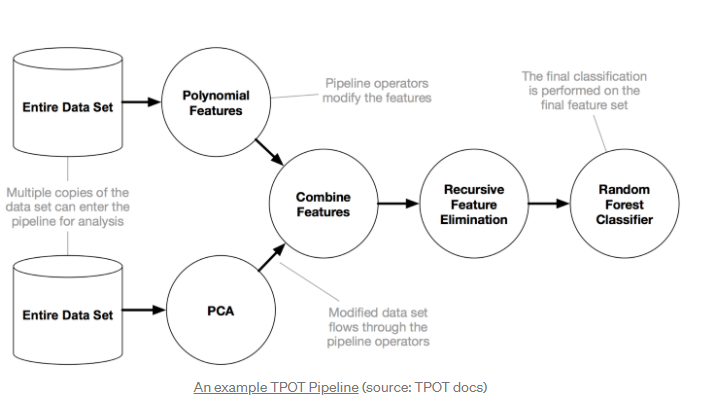

In [46]:
TP.fit(X_train,y_train)

TPOTClassifier(generations=3, n_jobs=-1, population_size=10, use_dask=True)

In [47]:
TP.export('best_model5.py') #mengeksport model

In [48]:
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [49]:
# exported_pipeline = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=0.7500000000000001, min_samples_leaf=13, min_samples_split=19, n_estimators=100, subsample=0.4)

# exported_pipeline.fit(X_train, y_train)

In [50]:
# exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=4, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)

# exported_pipeline.fit(X_train, y_train)

### Menjalankan model yang telah diekstrak oleh TPOT

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100)
exported_pipeline.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features=0.6000000000000001, min_samples_leaf=8,
                       min_samples_split=3)

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [62]:
scores = cross_val_score(exported_pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

### Menampilkan akurasi

In [63]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.854 (0.003)


In [64]:
exported_pipeline.score(X_test,y_test)

0.8536367386223017

In [65]:
client.close()